# Exploratory Data Analysis and Feature Engineering for Cardiovascular Risk Detection

**Author:** Juan Francisco Rodríguez

**Last Update:** 26/08/2024

**Github:** https://github.com/jfrg99/Heart-Disease-Classification-using-Supervised-Machine-Learning

## Table of Contents

1. Introduction
2. Data overview
3. Handling Problematic Outliers
    1. Cholesterol
    2. Resting Blood Pressure
    3. Maximum Heart Rate and Oldpeak
    4. Conclusions
4. Scaling Numerical Variables
    1. Understanding the Distribution
    2. Using ``MinMaxScaler()``
5. Encoding Categorical Variables
    1. Using OneHotEncoder() and OrdinalEncoder()
    2. Joining Scaled and Encoded Data
6. Dependency Between Features
    1. Correlation Matrices
    2. Covariance Matrix
    3. Dispersion Plots
    4. Conclusion
7. Features vs Target Variable
    1. Proportion of Heart Diseases for Each Category
    2. Proportion of Heart Diseases for Each Numerical Variable

## 1. Introduction

The first part of this project involves conducting an **Exploratory Data Analysis** (EDA) of our dataset and manipulating it to correct errors, normalize numerical values, and encode categorical variables.

All of this is done with the intention of later applying various machine learning **classification** models to predict the target variable, thereby creating a model capable of diagnosing whether a patient is at risk of heart failure.

The dataset for this project was obtained from the *Kaggle* website and can be found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). Although small, this dataset contains some of the most important features that related to potential heart disease.

## 2. Data Overview

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Before applying any model, it is important to perform exploratory data analysis to understand the nature of the data and make better use of machine learning.

Let's first take an overview of our dataset.

In [45]:
dataset = pd.read_csv("heartdata.csv")
display(dataset.head(10))
print(dataset.head(3))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  


We can see that we have both numerical and categorical variables. Obviously, the target variable is `HeartDisease`, which tell us if a patient actually has a heart problem (1) or not (0).
The features of our dataset are:

- **Age**: age of the patient in years.
- **Sex**: sex of the patient: male (M) or female (F).
- **Chest Pain Type**: Type of chest pain experienced by the patient. It can be:
    - **TA**: Typical Angina.
    - **ATA**: Atypical Angina.
    - **NAP**: Non-Anginal Pain.
    - **ASY**: Asymptomatic.
- **Resting BP**: Resting blood pressure, in mmHg. Normal resting blood pressure ranges from $98/60 mmHg$ to $120/80 mmHg$.
- **Cholesterol**: Serum cholesterol level in $mmg/dl$. Normal levels are typically below $200 mg/dL$, but it can be higher.
- **Fasting BS**: Fasting blood sugar level. It is 1 if its over $120 mg/dL$; and is 0 otherwise. Normal fasting blood sugar levels are below $100 mg/dL$.
- **Resting ECG**: Eesting electrocardiogram results. It can be:
    - **Normal**: Normal EGC.
    - **ST**: Having ST-T wave abnormality.
    - **LVH**: Showing probable or definite left ventricular hypertrophy by Estes's criteria.
- **Max HR**: Maximum heart rate achieved during exercise. It is a numeric value typically from $60$ to $202$ beats per minute.
- **Exercise Angina**: Exercise-induced angina, yes (Y) or no (N).
- **Oldpeak**: Numeric value of the ST depression induced by exercise relative to rest.  It indicates the severity of ischemia.
- **ST Slope**: The slope of the peak exercise ST segment. It can be:
    - **Up**: Upsloping.
    - **Flat**: Flat.
    - **Down**: Downsloping.
- **Heart Disease**: Output class: 1 if the patient has a heart disease, and 0 if the patient has a normal health.

___

We can use the `.info()` method to quickly check data types and if there are null values.

In [46]:
print("Data info:")
print(dataset.info())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


The dataset has a total of 918 entries, representing 918 patients. There are 11 features and 1 target variable, all with 918 non-null values, indicating that the dataset is completely clean and appears to have no missing values.

Here, ``HeartDisease`` and ``FastingBS`` have ``int64`` dtype, but they are actually categorical variables. So we have 12 features, where the numerical ones are Age, RestingBP, Cholesterol, MaxHR, and Oldpeak; and the categorical ones are Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, and HeartDisease. It is obvious that the target variable will be ``HeartDisease``.

In [47]:
# List of columns types:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

## 3. Handling Problematic Outliers

First of all, we need to detect the outliers and determine if they need to be treated of if we can leave in the sample. We can use the interquartile ranges to find them.

In [48]:
# Function to detect outliers using IQR and return a DataFrame with results
def detect_outliers_iqr(data):
    '''
    This function takes a dataframe 'data' with numerical cols and returns a dataframe outliers_df
    '''
    # Lists for the results
    outliers_count_list = []
    limite_inferior_list = []
    limite_superior_list = []
    
    # Detecting the outliers for each column
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers = (data[col] < lim_inf) | (data[col] > lim_sup)
        outliers_count = outliers.sum()
        
        outliers_count_list.append(outliers_count)
        limite_inferior_list.append(lim_inf)
        limite_superior_list.append(lim_sup)
    
    # Creating the final df
    outliers_df = pd.DataFrame({
        'Feature': data.columns,
        'Outliers_Count': outliers_count_list,
        'Lower_Limit': limite_inferior_list,
        'Upper_Limit': limite_superior_list
    })
    
    return outliers_df

Using this function is easy to find the number of outliers and the lower and upper limits.

In [49]:
outliers_df = detect_outliers_iqr(dataset[num_cols])

display(outliers_df)

,Feature,Outliers_Count,Lower_Limit,Upper_Limit
0,Age,0,27.500,79.500
1,RestingBP,28,90.000,170.000
2,Cholesterol,183,32.625,407.625
3,MaxHR,2,66.000,210.000
4,Oldpeak,16,-2.250,3.750


So:

- No outliers for `Age`, which means the age range is very well selected.
- A few outliers for `RestingBP`, `MaxHR` and `Oldpeak`.
- A lot of outiers in the `Cholesterol` variable.

Let's see how are these features more deeply. For numerical features, we can use the ``.describe()`` method to obtain a statistical summary.

In [50]:
print("Numerical features summary:")
display(dataset[num_cols].describe().round(2))

Numerical features summary:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


### 3.1 Cholesterol

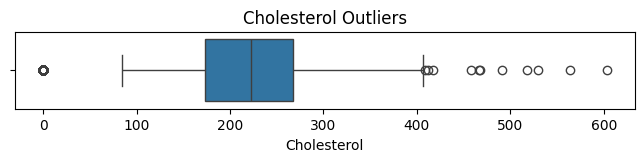

In [51]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=dataset["Cholesterol"])
plt.title('Cholesterol Outliers')
plt.xlabel('Cholesterol')
plt.show()

The first thing we can see is that values of 0 in the variables `RestingBP` and `Cholesterol` do not have any sense. They are not just outliers; these are poorly taken samples that seriously harm our data analysis and, as a result, our predictive models will be completely wrong.

Let's split the dataset into the samples with a cholesterol of 0 and the rest, and let's see what's happen.

In [52]:
print("For Cholesterol = 0:")
display(dataset[dataset['Cholesterol'] == 0].describe().round(3))

print("For Cholesterol != 0:")
display(dataset[dataset['Cholesterol'] != 0].describe().round(3))

For Cholesterol = 0:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,172.000,172.000,172.0,172.000,172.000,172.000,172.000
mean,56.238,129.680,0.0,0.517,121.988,0.826,0.884
std,8.616,22.972,0.0,0.501,24.166,1.040,0.321
min,32.000,0.000,0.0,0.000,60.000,-2.600,0.000
25%,51.750,115.000,0.0,0.000,108.000,0.000,1.000
50%,57.500,129.000,0.0,1.000,120.000,0.750,1.000
75%,62.000,140.000,0.0,1.000,138.250,1.500,1.000
max,74.000,200.000,0.0,1.000,182.000,3.700,1.000


For Cholesterol != 0:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000,746.000,746.000,746.000,746.000,746.000,746.000
mean,52.882,133.023,244.635,0.168,140.227,0.902,0.477
std,9.506,17.283,59.154,0.374,24.524,1.073,0.500
min,28.000,92.000,85.000,0.000,69.000,-0.100,0.000
25%,46.000,120.000,207.250,0.000,122.000,0.000,0.000
50%,54.000,130.000,237.000,0.000,140.000,0.500,0.000
75%,59.000,140.000,275.000,0.000,160.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


We can see that when the cholesterol is not 0, the range of values is $[85,603]$, which makes sense and are possible ranges in real life.

Also, we can see that nearly 90% of these patients have a heart diseases, so we have to consider that in order to handle these values.

In [53]:
print(dataset[dataset['Cholesterol'] == 0]['HeartDisease'].value_counts())

HeartDisease
1    152
0     20
Name: count, dtype: int64


There are several ways to handle these values:
- **Drop incorrect values**: This is not the best idea in our case because they represent 16.5% of the total dataset, and dropping them would result in a significant loss of other features.
- **Predict the values using some regression models**: I prefer not to do this because the idea of this project is to apply classification methods. Applying a machine learning model over features that were also predicted using the same features could skew the results.
- **Replace them using a general statistic of the rest of the dataset**: This is the best option in my opinion. We can consider the median instead of the mean to reduce the impact on variance, as some ML models are sensitive to it.

Also, as there are more presence of patients with heart disease, I think it would be convenient to assign the median according to this variable to have values ​​that are more in line with reality.

In [54]:
# Getting the medians and the means according to the value of HeartDisease
median_hd_0 = dataset[(dataset['Cholesterol'] != 0) & (dataset['HeartDisease'] == 0)]['Cholesterol'].median()
median_hd_1 = dataset[(dataset['Cholesterol'] != 0) & (dataset['HeartDisease'] == 1)]['Cholesterol'].median()

mean_hd_0 = dataset[(dataset['Cholesterol'] != 0) & (dataset['HeartDisease'] == 0)]['Cholesterol'].mean()
mean_hd_1 = dataset[(dataset['Cholesterol'] != 0) & (dataset['HeartDisease'] == 1)]['Cholesterol'].mean()

print(f"Median for HeartDisease = 0: {median_hd_0}")
print(f"Mean for HeartDisease = 0: {mean_hd_0}\n")

print(f"Median for HeartDisease = 1: {median_hd_1}")
print(f"Mean for HeartDisease = 1: {mean_hd_1}")

new_dataset = dataset.copy()

new_dataset['Cholesterol'] = new_dataset['Cholesterol'].astype(float)

new_dataset.loc[(new_dataset['Cholesterol'] == 0) & (new_dataset['HeartDisease'] == 0), 'Cholesterol'] = median_hd_0
new_dataset.loc[(new_dataset['Cholesterol'] == 0) & (new_dataset['HeartDisease'] == 1), 'Cholesterol'] = median_hd_1

display(new_dataset.head())

Median for HeartDisease = 0: 231.5
Mean for HeartDisease = 0: 238.76923076923077

Median for HeartDisease = 1: 246.0
Mean for HeartDisease = 1: 251.06179775280899


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


Now, we also have outiers which represent high cholesterol values.

In [55]:
display(dataset[dataset["Cholesterol"] >= 407])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1


These values, although very high, are actually plausible and may have a direct connection with heart problems and we could consider them for the analysis.

### 3.2 Resting Blood Pressure

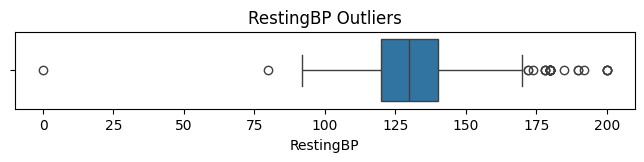

In [56]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=dataset["RestingBP"])
plt.title('RestingBP Outliers')
plt.xlabel('RestingBP')
plt.show()

This is a similar case to the cholesterol one, the blood presure can't be 0, but the rest of the outliers are plausible values, so we will keep them.

For 0, we replace them using the mediam again, but this time have only one patient.

In [57]:
print(f"Number of patients with a RestingBP of 0: {len(dataset[dataset["RestingBP"] == 0])}")
display(dataset[dataset['RestingBP'] == 0])
median_bp = dataset[(dataset['RestingBP'] != 0)]['RestingBP'].median()
print(f"Median of RestingBP different of 0: {median_bp}")
new_dataset.loc[(new_dataset['RestingBP'] == 0), 'RestingBP'] = median_bp
display(new_dataset.loc[[449]])

Number of patients with a RestingBP of 0: 1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Median of RestingBP different of 0: 130.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,130,246.0,0,Normal,155,N,1.5,Flat,1


And the patients over 170 are:

In [58]:
display(dataset[dataset["RestingBP"] >= 170].head(10))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0


### 3.3 Maximum Hear Rate and Oldepeak

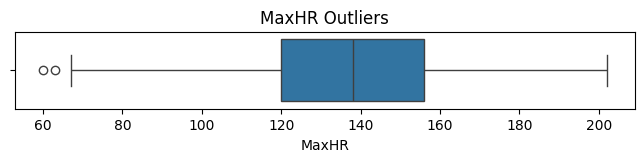

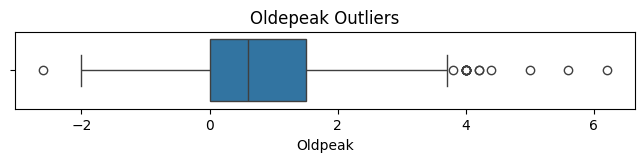

In [59]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=dataset["MaxHR"])
plt.title('MaxHR Outliers')
plt.xlabel('MaxHR')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(x=dataset["Oldpeak"])
plt.title('Oldepeak Outliers')
plt.xlabel('Oldpeak')
plt.show()

In [60]:
dataset[dataset['MaxHR'] <= 66]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [61]:
dataset[(dataset['Oldpeak'] <= -2.25) | (dataset['Oldpeak'] >= 3.75)].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1


### 3.4 Conclusions

Let's see the proportion of outliers with heart diseases in these variables:

In [62]:
chol_out = len(dataset[dataset["Cholesterol"] >= 407])
chol_out_disease = len(dataset[(dataset["Cholesterol"] >= 407) & (dataset['HeartDisease'] == 1)])
chol_proportion = 100*chol_out_disease/chol_out
rest_out = len(dataset[dataset["RestingBP"] >= 170])
rest_out_disease = len(dataset[(dataset["RestingBP"] >= 170) & (dataset['HeartDisease'] == 1)])
rest_proportion = 100*rest_out_disease/rest_out
old_out = len(dataset[(dataset['Oldpeak'] <= -2.25) | (dataset['Oldpeak'] >= 3.75)])
old_out_disease = len(
    dataset[
        ((dataset['Oldpeak'] <= -2.25) | (dataset['Oldpeak'] >= 3.75)) & (dataset["HeartDisease"] == 1)
    ]
    )
old_proportion = 100*old_out_disease/old_out
print(f"The proportion of upper outliers with heart diseases in the Cholesterol variable is {chol_proportion}%")
print(f"The proportion of upper outliers with heart diseases in the RetingBP variable is {rest_proportion}%")
print("The proportion of outliers with heart diseases in the MaxRP variable is 100%")
print(f"The proportion of outliers with heart diseases in the Oldpeak variable is {old_proportion}%")

The proportion of upper outliers with heart diseases in the Cholesterol variable is 58.333333333333336%
The proportion of upper outliers with heart diseases in the RetingBP variable is 70.0%
The proportion of outliers with heart diseases in the MaxRP variable is 100%
The proportion of outliers with heart diseases in the Oldpeak variable is 93.75%


These results show that outliers in the variables Cholesterol, RestingBP, MaxHR, and Oldpeak have a high proportion of patients with heart disease, suggesting that these variables might be important for predicting or understanding heart disease.

The DataFrame `new_dataset` contains the data after the imputation of the problematic outliers. We can see in the summary that the new values are so much consistent.

In [63]:
new_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,244.575163,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.356165,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,246.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [64]:
# Saving the new dataset if needed
#new_dataset.to_csv('heartdata_imputed.csv', index=False)

## 3. Scaling Numerical Values

Normalizing data is an important step in applying machine learning as alogorithms are based on distances. The library `sklearn` provides two main scalers: `MinMaxScaler()` and `StandardScaler()`. The first one scales the data to the $[0,1]$ interval, while the second one scales the data centering it to the mean, making it more suitable for data that follows a normal distribution.

So first of all, we need to determine which scaler will work better with our data.

In [65]:
import pandas as pd

In [66]:
new_dataset = pd.read_csv('heartdata_imputed.csv')
new_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [67]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
target = "HeartDisease"

### 4.1 Understanding the Distribution

We can visualize the distribution of the data using a histogram with `matplotlib` and `seaborn`.

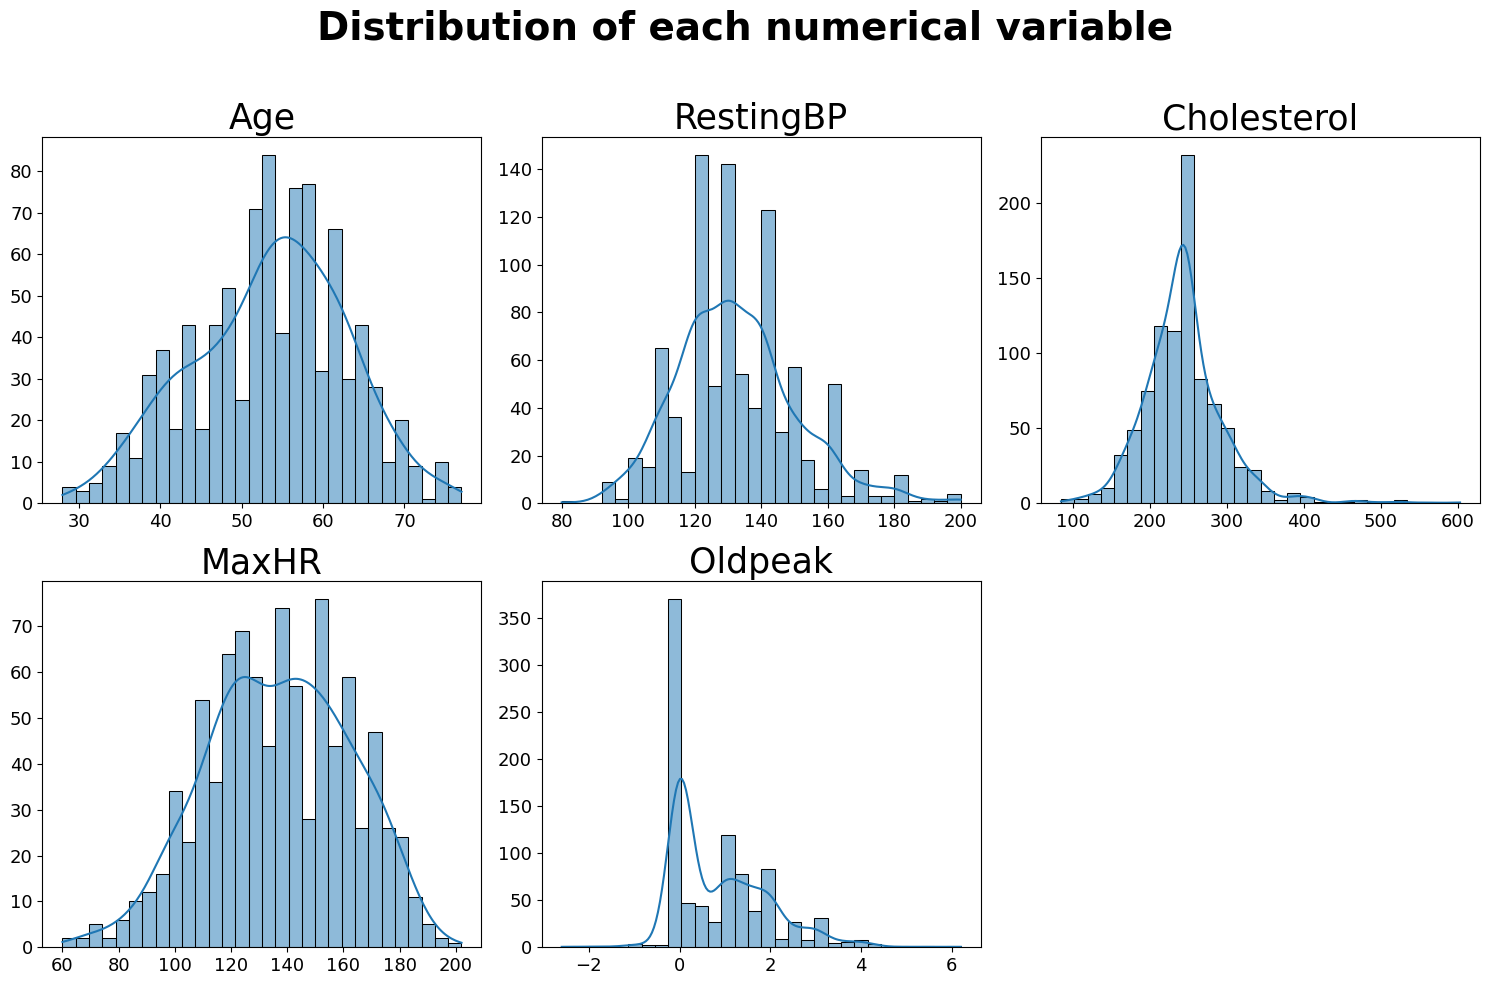

In [68]:
# Creating the axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df = new_dataset

# Numerical Columns
for i, col in enumerate(num_cols):
    sns.histplot(df[col],
                 bins = 30,
                 kde = True,
                 ax = axes[i//3, i%3])
    axes[i//3, i%3].set_title(col, fontsize = 25)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
    axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=13)

fig.delaxes(axes[1, 2])

plt.suptitle("Distribution of each numerical variable\n", fontsize = 28, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('numerical_distribution.png', format='png', dpi=300)
plt.show()

Looking at these charts, some of them seem to follow a normal distribution. However, there are some quantitative ways to measure if a distribution is a normal distribution. Some of them are:

- The [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test), which performs a hypothesis test with the null hypothesis that data are normally distributed.

- The [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), a non-parametric test that compares a sample with a reference distribution (or two samples with each other) by measuring the maximum distance between the empirical cumulative distribution functions of the samples and the reference distribution. If this distance is large, the null hypothesis that the samples come from the same distribution is rejected.
- The [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test), a modification of the Kolmogorov-Smirnov test and gives more weight to the tails of the distribution, making it especially useful for detecting deviations from normality in the data.

All these tests are implemente in `scipy`, see the documentation [SW doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), [KS doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) and [AD doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html).

Another method to visualize if the data follows a normal distribution is using a [Q-Q Plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) which visually compares a data set to a theoretical distribution. It is not directly implemented in Python but we can use the following package: [Probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).

Two important metrics in the study of normal distribution are skewness and kurtosis:
- [Skewness](https://en.wikipedia.org/wiki/Skewness). Measures how skewed a distribution is. Negative values ​​indicate skewness to the left, and positive values ​​indicate skewness to the right.
- [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis). Measures how "pointed" or "flattened" a distribution is. A value of 3 indicates that it follows a normal distribution, values ​​less than 3 indicate a flattened normal distribution, and values ​​greater than 3 indicate a pointed normal distribution.


In [69]:
import scipy.stats as stats

# Significance level
alpha = 0.01

# Dictionary to save the results
results = {
    'Variable': [],
    'Skewness': [],
    'Kurtosis': [],
    'Shapiro-Wilk': [],
    'Kolmogorov-Smirnov': [],
    'Anderson-Darling': []
}

# Performing each test
for col in num_cols:
    data = new_dataset[col]
    
    # Skewness
    skewness = data.skew()
    
    # Kurtosis
    kurtosis = data.kurtosis()
    
    # Shapiro-Wilk
    shapiro_test = stats.shapiro(data)
    shapiro_result = 'Yes' if shapiro_test.pvalue > alpha else 'No'

    # Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    kolmogorov_result = 'Yes' if ks_test.pvalue > alpha else 'No'
    
    #Anderson-Darling
    ad_test = stats.anderson(data, dist='norm')
    ad_result = 'Yes' if ad_test.statistic < ad_test.critical_values[2] else 'No'

    # Saving values
    results['Variable'].append(col)
    results['Skewness'].append(skewness)
    results['Kurtosis'].append(kurtosis)
    results['Shapiro-Wilk'].append(shapiro_result)
    results['Kolmogorov-Smirnov'].append(kolmogorov_result)
    results['Anderson-Darling'].append(ad_result)

results_df = pd.DataFrame(results)
display(results_df)
#print(results_df)

,Variable,Skewness,Kurtosis,Shapiro-Wilk,Kolmogorov-Smirnov,Anderson-Darling
0,Age,-0.195933,-0.386140,No,No,No
1,RestingBP,0.607964,0.796195,No,No,No
2,Cholesterol,1.373524,6.237637,No,No,No
3,MaxHR,-0.144359,-0.448248,No,Yes,No
4,Oldpeak,1.022872,1.203064,No,No,No


All tests reject the hypothesis that the data follow normal distributions, and the skewness and kurtosis values also highlight this difference from a normal distribution.

We can also plot the Q-Q plots:

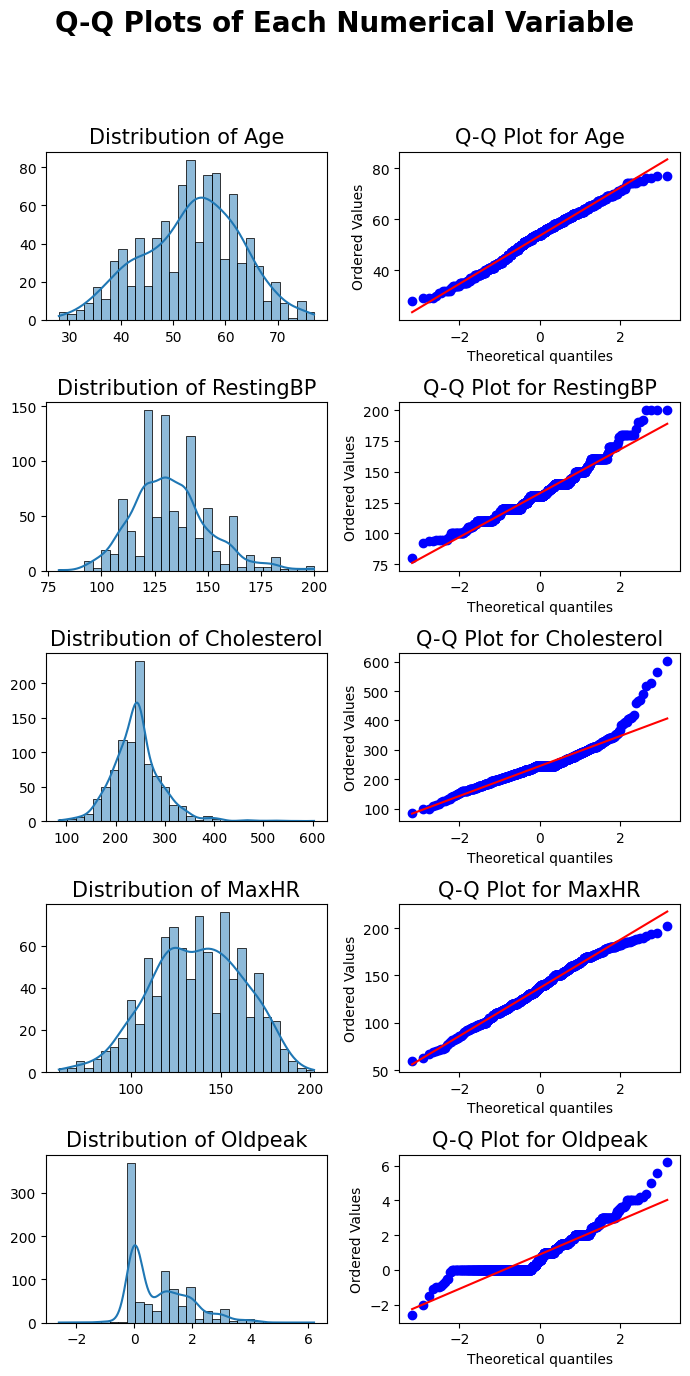

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = new_dataset

# Crear una figura con subplots
fig, axes = plt.subplots(5, 2, figsize=(7, 14))

# Iterar sobre las columnas numéricas
for i, col in enumerate(num_cols):
    # Histograma con KDE
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=15)
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    axes[i, 0].tick_params(axis='both', which='major', labelsize=10)
    
    # Q-Q Plot
    stats.probplot(df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot for {col}', fontsize=15)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=10)

# Ajustar el layout
plt.suptitle("Q-Q Plots of Each Numerical Variable\n", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig('numerical_distribution_qqplots.png', format='png', dpi=300)
plt.show()


Therefore, the best option is to use ``MinMaxScaler()`` to normalize our data.

### 4.2 Using MinMaxScaler()

In [71]:
from sklearn.preprocessing import MinMaxScaler
## Crating the scaler instance:
scaler = MinMaxScaler()
## Scaling the features
norm_data = pd.DataFrame()
norm_data[num_cols] = scaler.fit_transform(new_dataset[num_cols])
print('Scaled Data:')
display(norm_data.head())
display(norm_data.describe())

Scaled Data:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.500000,0.393822,0.788732,0.295455
1,0.428571,0.666667,0.183398,0.676056,0.409091
2,0.183673,0.416667,0.382239,0.267606,0.295455
3,0.408163,0.483333,0.249035,0.338028,0.465909
4,0.530612,0.583333,0.212355,0.436620,0.295455


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.437818,0.308060,0.540911,0.396291
std,0.192502,0.149918,0.103004,0.179298,0.121201
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.422535,0.295455
50%,0.530612,0.416667,0.310811,0.549296,0.363636
75%,0.653061,0.500000,0.351351,0.676056,0.465909
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Encoding Categorical Variables

In order to compare categorical features with the numerical ones and apply machine learning, is necesary to transform them into numerical values. The library `sklearn` provides many encoders based on different criteria. It's important to understand the nature of this categories.

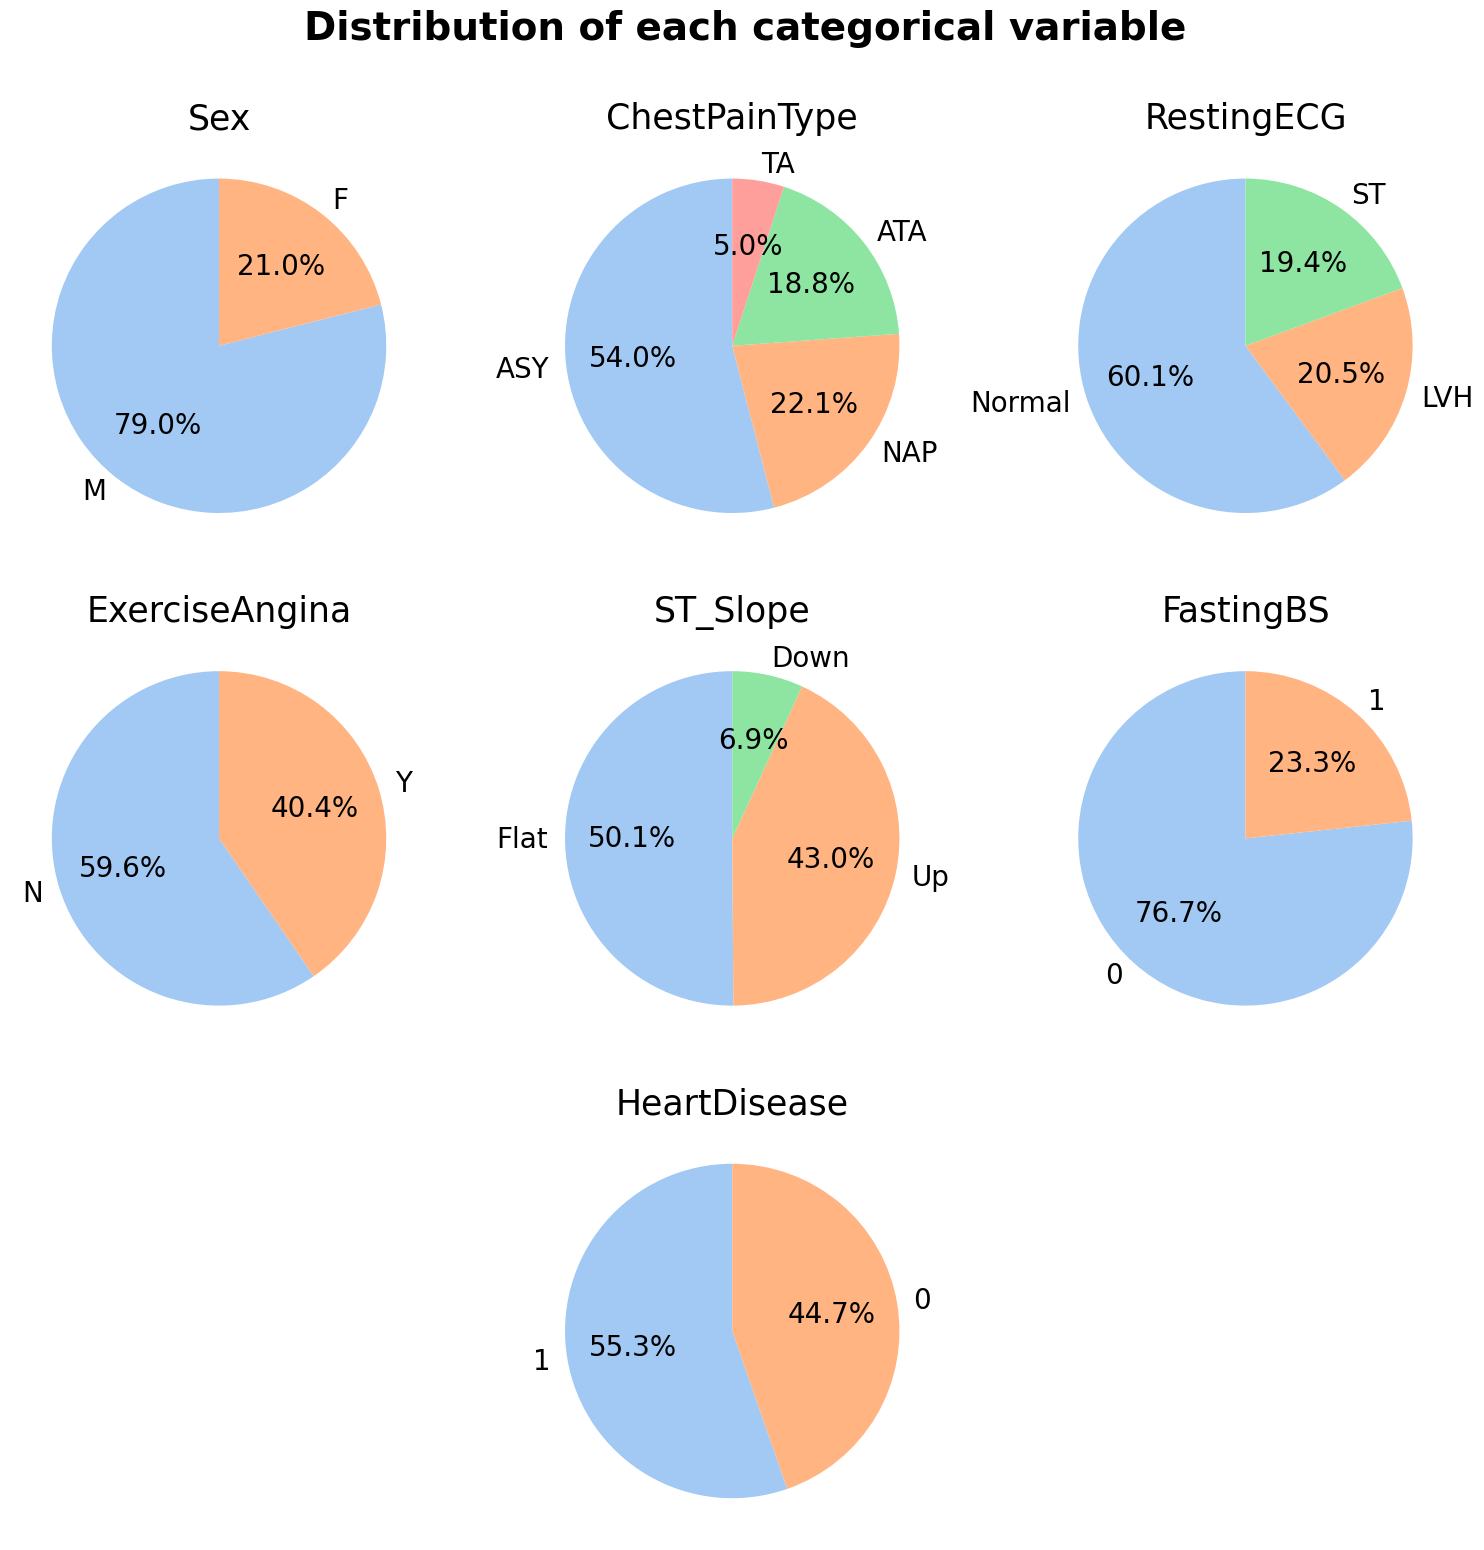

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the axes
fig, axes = plt.subplots(3, 3, figsize=(15, 16))

df = new_dataset

# Categorical Columns
for i, col in enumerate(cat_cols):
    data = df[col].value_counts()
    axes[i//3, i%3].pie(data,
                        labels = data.index,
                        autopct = '%1.1f%%',
                        startangle = 90,
                        colors = sns.color_palette('pastel'),
                        textprops = {'fontsize': 20}
    )
    axes[i//3, i%3].set_title(col, fontsize = 25)

data = df[target].value_counts()
axes[2, 1].pie(data,
               labels = data.index,
               autopct = '%1.1f%%',
               startangle = 90,
               colors = sns.color_palette('pastel'),
               textprops = {'fontsize': 20}
)
axes[2,1].set_title(target, fontsize = 25)

fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 2])


plt.suptitle("Distribution of each categorical variable\n", fontsize = 28, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('cat_pie.png', format='png', dpi=300)
plt.show()

We can see that:
- `HeartDisease` and `FastingBS` are already numerical.

- ``Sex`` and ``ExerciseAngina`` are binary and cannot be ordered, so we can use `OneHotEncoder`.

- The features ``ChestPainType`` and ``RestingECG`` have 4 and 3 categories respectively, but they can't be ordered, so it is not a good idea to encode them using numerical values $0,1,2,\dots$; the best way to proceed is using `OneHotEncoder` again, but it will create new features, one for each category.

- Finally, ``ST_Slope`` has more than $2$ categories, but the can be sorted as `Down` < `Flat` < `Up`. So we can use an ordinal encoder for it, such as `OrdinalEncoder` from the `preprocessing` module.

### 5.1 Using OneHotEncoder and OrdinalEncoder

In [73]:
new_dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [74]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Creating the instances
onehot_encoder = OneHotEncoder(sparse_output=False)
# For ordinal is needed to stablish a order
ordinal_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])

## Encoding 
# Here we are "splitting" the categorical columns into their subcategories
# It returns an array
encoded_categorical = onehot_encoder.fit_transform(new_dataset[['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina']])
# Converting it into a df
cod_data = pd.DataFrame(encoded_categorical,
                          columns=onehot_encoder.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina']))
# Encoding the ordinal column
cod_data['STSlope_encoded'] = ordinal_encoder.fit_transform(new_dataset[['ST_Slope']])


print("Encoded Categories:")
display(cod_data.head())

Encoded Categories:


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,STSlope_encoded
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0


### 5.2 Joining Scaled and Encoded Data

In [75]:
final_dataset = pd.concat([norm_data, cod_data], axis=1)
# Adding the target column
final_dataset['HeartDisease'] = new_dataset['HeartDisease']
display(final_dataset.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,STSlope_encoded,HeartDisease
0,0.244898,0.500000,0.393822,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
1,0.428571,0.666667,0.183398,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
2,0.183673,0.416667,0.382239,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0
3,0.408163,0.483333,0.249035,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1
4,0.530612,0.583333,0.212355,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0


Let's rename the columns.

In [76]:
new_names = {
    'Age' : 'Age',
    'RestingBP' : 'RBP',
    'Cholesterol' : 'Chol',
    'MaxHR' : 'MaxHR',
    'Oldpeak' :'Oldpeak',
    'Sex_F' : 'F',
    'Sex_M' : 'M',
    'ChestPainType_ASY' : 'CPT_ASY',
    'ChestPainType_ATA' : 'CPT_ATA',
    'ChestPainType_NAP' : 'CPT_NAP',
    'ChestPainType_TA' : 'CPT_TA',
    'RestingECG_LVH' : 'RECG_LVH',
    'RestingECG_Normal' : 'RECG_N',
    'RestingECG_ST' : 'RECG_ST',
    'ExerciseAngina_Y' : 'EAY',
    'ExerciseAngina_N' : 'EAN',
    'STSlope_encoded' : 'STSlope',
    'HeartDisease' : 'Disease'
}
new_order = ['Age', 'F', 'M', 'RBP', 'Chol', 'MaxHR', 'Oldpeak', 'CPT_ASY',
             'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_N', 'RECG_ST',
             'STSlope','EAY', 'EAN', 'Disease']
final_num_cols = [new_names.get(col, col) for col in num_cols]
final_cat_cols = ['F', 'M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA',
            'RECG_LVH', 'RECG_N', 'RECG_ST','STSlope','EAY', 'EAN']

In [77]:
final_dataset.rename(columns=new_names, inplace=True)
final_dataset = final_dataset[new_order]
final_dataset.head()

,Age,F,M,RBP,Chol,MaxHR,Oldpeak,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,RECG_LVH,RECG_N,RECG_ST,STSlope,EAY,EAN,Disease
0,0.244898,0.0,1.0,0.500000,0.393822,0.788732,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0
1,0.428571,1.0,0.0,0.666667,0.183398,0.676056,0.409091,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
2,0.183673,0.0,1.0,0.416667,0.382239,0.267606,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0
3,0.408163,1.0,0.0,0.483333,0.249035,0.338028,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
4,0.530612,0.0,1.0,0.583333,0.212355,0.436620,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0


In [78]:
# Saving if needed
#final_dataset.to_csv("heartdata_final.csv", index=False)

___
___

## 6. Dependency Between Features

There are many ways to measure the dependency between variables. The best known is calculating the linear correlation between the features (Pearson), we can use different criteria of correlation such as Spearman or Kendall. We can also get the covariance relationships between the features.

### 6.1 Correlation Matrices

As we said, there are three main types of correlation:
- [**Pearson**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). That measures the linear correlation.
- [**Spearman**](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). That measures momotonic relationships.
- [**Kendall**](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient). Also measures the monotonic relationships but works better with ordinal variables.

Pandas provides a method to calculate the matrices directly from the DataFrame specifying the method. We can plot the results using a heatmap.

- Pearson Matrix

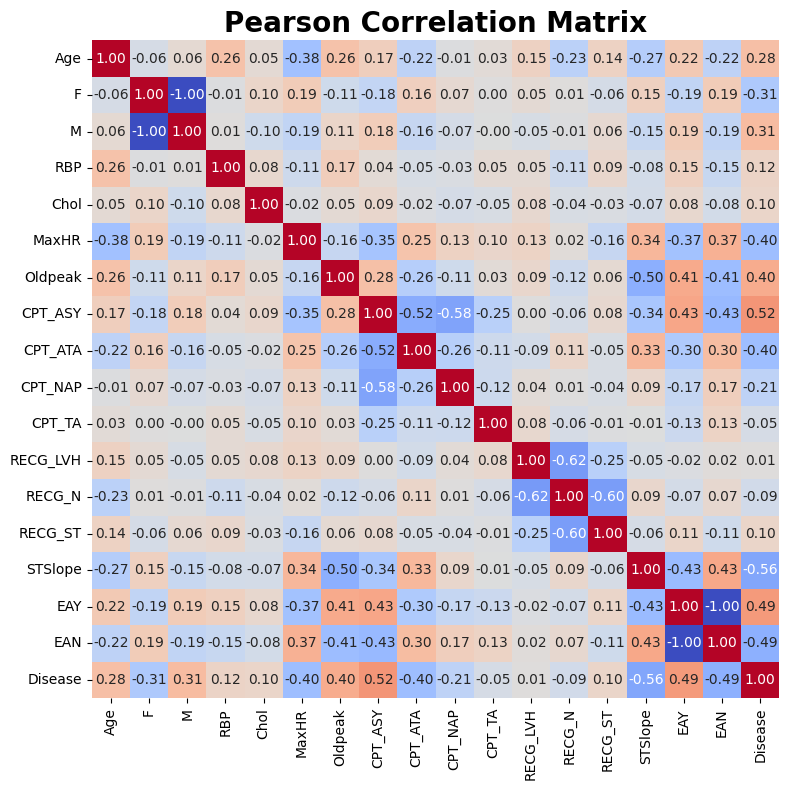

In [79]:
plt.rcdefaults()
# Pearson
pearson_corr = final_dataset.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f',cbar = False)
plt.title('Pearson Correlation Matrix',fontweight='bold',fontsize=20)
plt.tight_layout()
#plt.savefig('pearson_matrix.png', format='png', dpi=300)
plt.show()

- Spearmar Matrix

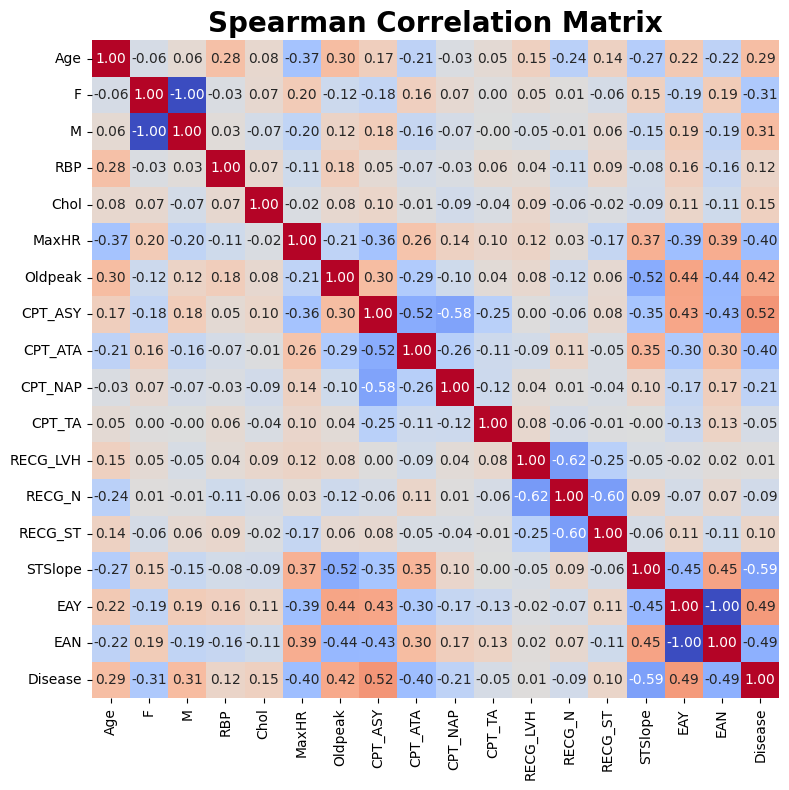

In [80]:
# Spearman
spearman_corr = final_dataset.corr(method='spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f',cbar = False)
plt.title('Spearman Correlation Matrix',fontweight='bold',fontsize=20)
plt.tight_layout()
#plt.savefig('spearman_matrix.png', format='png', dpi=300)
plt.show()

- Kendall Matrix

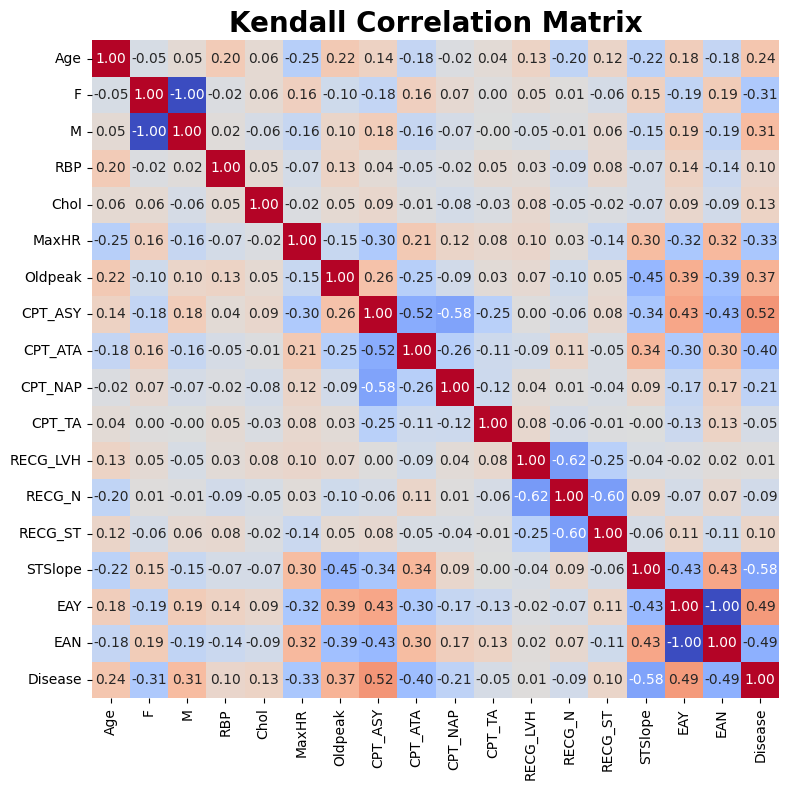

In [81]:
# Kendall
kendall_corr = final_dataset.corr(method='kendall')
plt.figure(figsize=(8, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f',cbar = False)
plt.title('Kendall Correlation Matrix',fontweight='bold',fontsize=20)
plt.tight_layout()
#plt.savefig('kendall_matrix.png', format='png', dpi=300)
plt.show()

### 6.2 Covariance Matrix

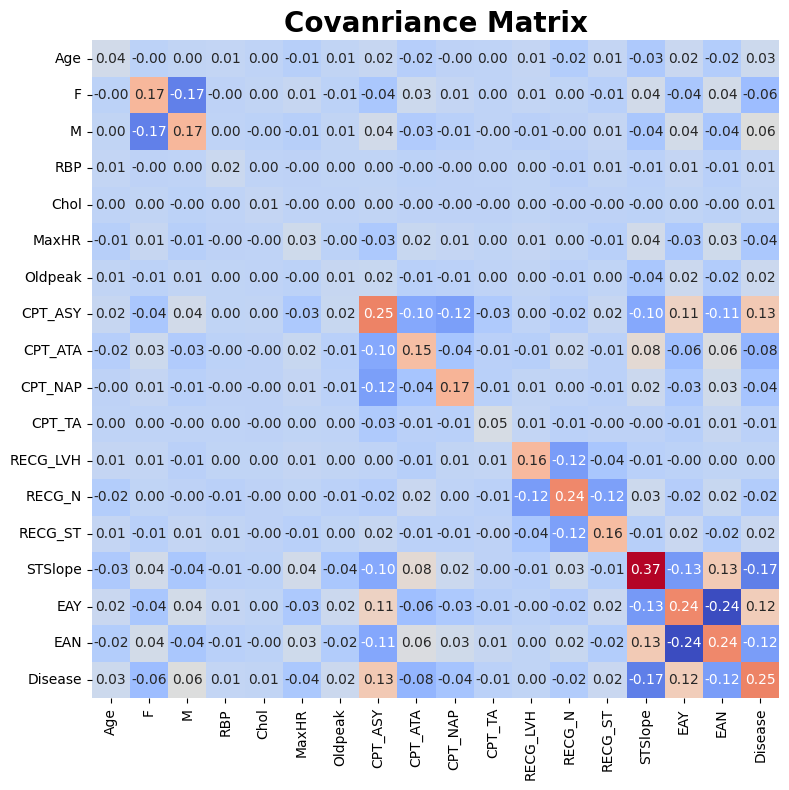

In [82]:
# Covariance
cov = final_dataset.cov()
plt.figure(figsize=(8, 8))
sns.heatmap(cov, annot=True, cmap='coolwarm', fmt='.2f',cbar = False)
plt.title('Covanriance Matrix',fontweight='bold',fontsize=20)
plt.tight_layout()
#plt.savefig('cov_matrix.png', format='png', dpi=300)
plt.show()

Looking at the heatmaps, it's obvious that there is a low correlation and covariance between all features, which is a good sign because it means that our variables are, in fact, independent.

Also, we can plot the distribution of all matrices to see the low relationship.

In [83]:
import numpy as np
## Deleting the values under the main diagonal because the correlation matrix is symmetric

def corr_histogram(matrix):
    '''
    This function takes a dataframe that correspond to a correlation or covariance matrix
    and return a histogram of the frequency of its values
    '''
    tril_index = np.tril_indices_from(matrix)
    for coord in zip(*tril_index):
        # Setting the elements under the diagonal to nan values
        matrix.iloc[coord[0], coord[1]] = np.nan
    values = (matrix
              .stack()
              .to_frame()
              .reset_index()
              .rename(columns={'level_0':'feature1',
                               'level_1':'feature2',
                                 0:'correlation'}
    ))
    # Get the absolute values for sorting
    values['abs_correlation'] = values['correlation'].abs()

    return values

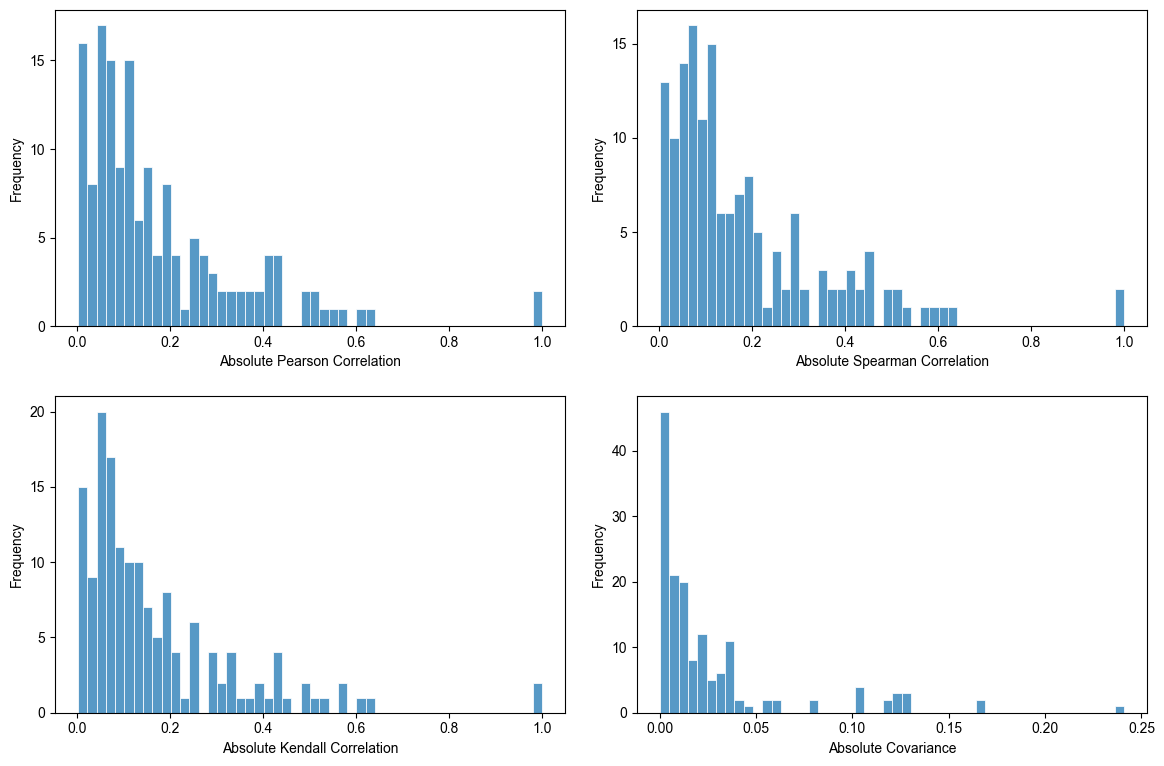

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.set_context('talk')
sns.set_style('white')

values = corr_histogram(pearson_corr)
sns.histplot(values['abs_correlation'], bins=50, ax=axes[0, 0])
axes[0, 0].set(xlabel='Absolute Pearson Correlation', ylabel='Frequency')

values = corr_histogram(spearman_corr)
sns.histplot(values['abs_correlation'], bins=50, ax=axes[0, 1])
axes[0, 1].set(xlabel='Absolute Spearman Correlation', ylabel='Frequency')

values = corr_histogram(kendall_corr)
sns.histplot(values['abs_correlation'], bins=50, ax=axes[1, 0])
axes[1, 0].set(xlabel='Absolute Kendall Correlation', ylabel='Frequency')

values = corr_histogram(cov) 
sns.histplot(values['abs_correlation'], bins=50, ax=axes[1, 1])
axes[1, 1].set(xlabel='Absolute Covariance', ylabel='Frequency')

plt.tight_layout()
#plt.savefig('corr_hist.png', format='png', dpi=300)
plt.show()

### 6.3 Dispersion Plots

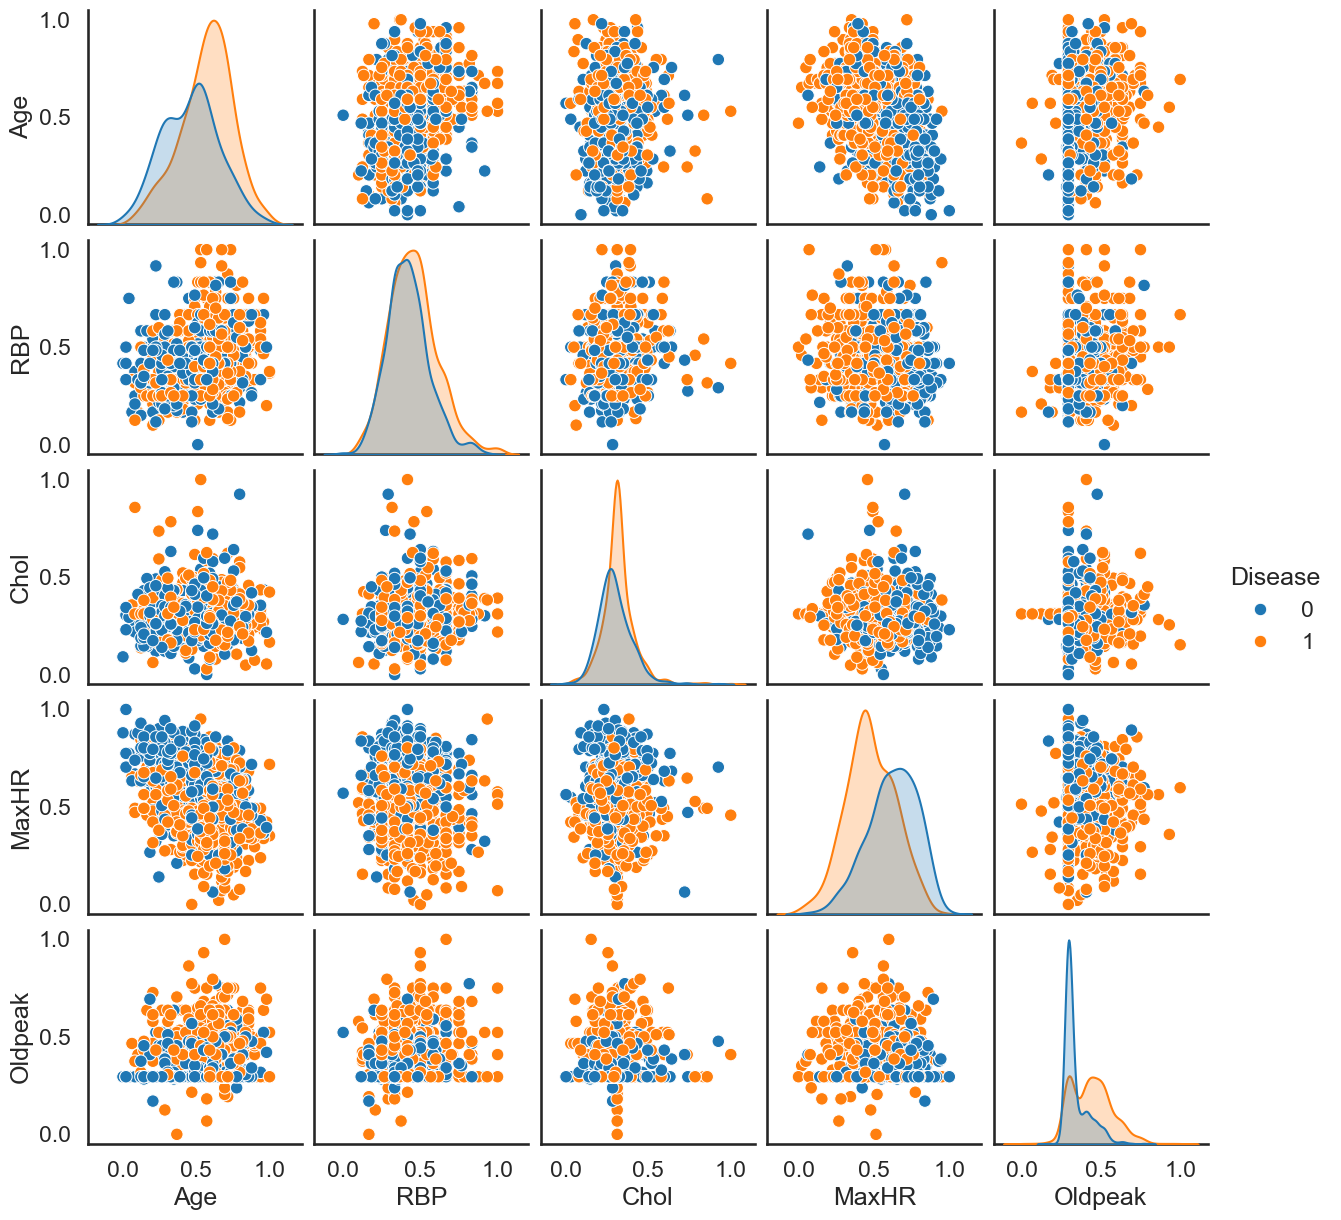

In [86]:
df = final_dataset[final_num_cols + ["Disease"]].copy() 

sns.pairplot(df, hue='Disease')

### 5.4 Conclusion

Based on the matrices and the scatter plots, we can conclude that the variables in our dataset are independent. This independence is beneficial for our machine learning models, as it reduces the risk of multicollinearity and ensures that each feature contributes unique information to the model.

## 7. Features vs Target Variable

In the same way, we can get the correlations between each feature and the target variable.

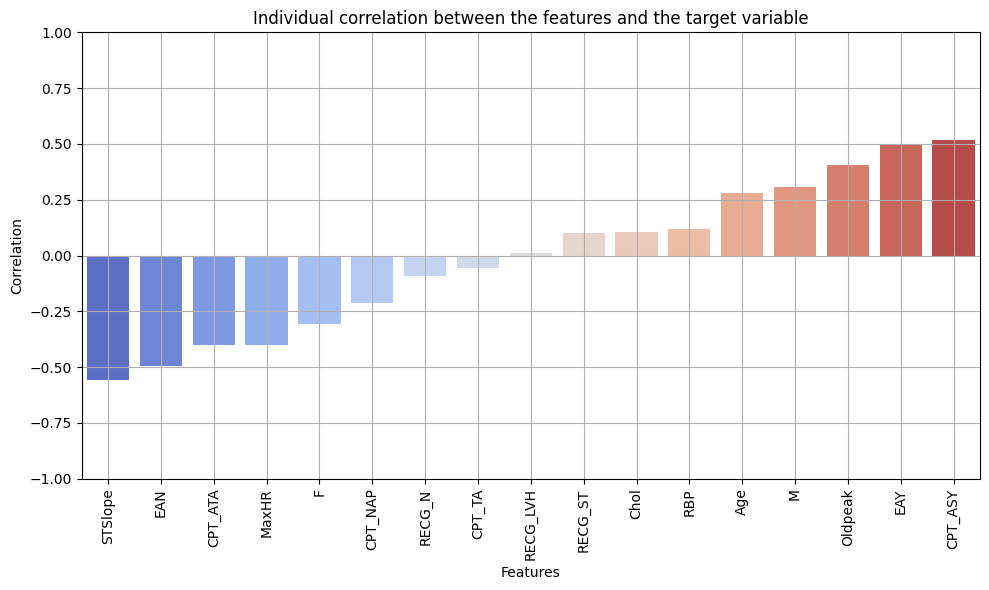

In [87]:
# Selecting the target column
target = final_dataset.columns[-1]
# Calculating the correlations
corr_target = final_dataset.corr()[target]
corr_target = corr_target.drop(target)
corr_target = corr_target.sort_values()
# Plotting the results
df_temp = pd.DataFrame({'features': corr_target.index, 'correlation': corr_target.values})

# barchart:
plt.rcdefaults()
plt.figure(figsize=(10, 6))
sns.barplot(x='features', y='correlation',hue='features', data=df_temp, palette='coolwarm')
plt.title('Individual correlation between the features and the target variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.ylim(-1, 1)  
plt.xticks(rotation=90) 
plt.grid()
plt.tight_layout()
#plt.savefig('target_corr.png', format='png', dpi=300)
plt.show()

### 7.1 Proportion of Heart Diseases for Each Category

In [88]:
df = final_dataset[final_cat_cols + ['Disease']]

encoded_cols = [item for item in final_cat_cols if item != "STSlope"]

proportions = pd.DataFrame()

for col in encoded_cols:
    prop = df[df[col] == 1].groupby('Disease').size().div(len(df[df[col] == 1]))
    prop = prop.reset_index(name='Proportion')
    prop['Category'] = col
    proportions = pd.concat([proportions, prop])

for value in df['STSlope'].unique():
    prop = df[df['STSlope'] == value].groupby('Disease').size().div(len(df[df['STSlope'] == value]))
    prop = prop.reset_index(name='Proportion')
    prop['Category'] = f'STSlope_{value}'
    proportions = pd.concat([proportions, prop])

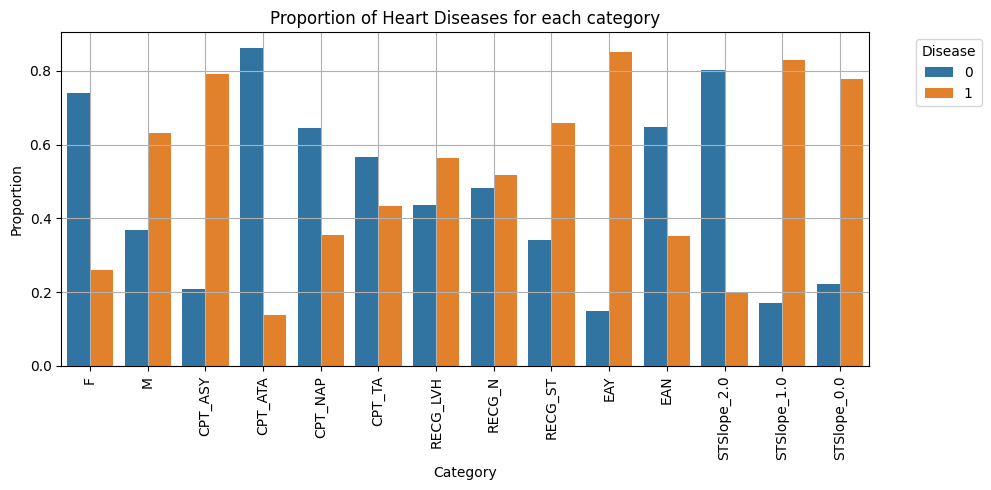

In [89]:

proportions.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Proportion', hue='Disease', data=proportions, palette='tab10')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Proportion of Heart Diseases for each category')
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

### 7.2 Proportion of Heart Diseases for Each Numerical Variable

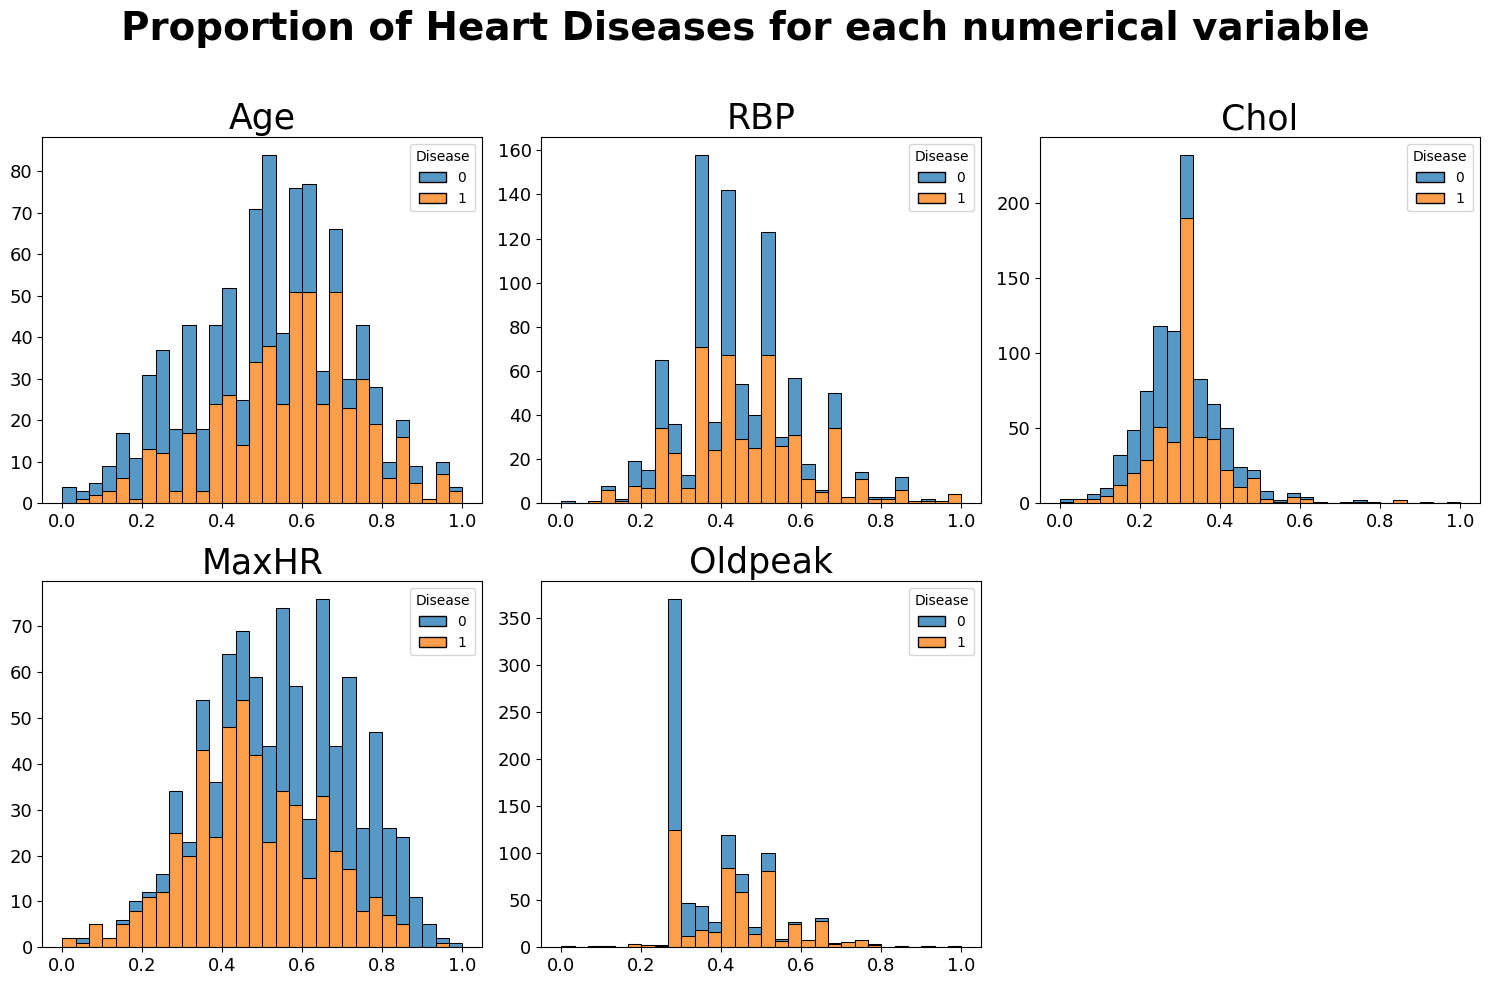

In [109]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df = final_dataset

for i, col in enumerate(final_num_cols):
    sns.histplot(data=df, x=col, hue='Disease', multiple='stack', palette='tab10', bins=30, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col, fontsize=25)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
    axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=13)

fig.delaxes(axes[1, 2])

plt.suptitle("Proportion of Heart Diseases for each numerical variable\n", fontsize=28, fontweight='bold')
plt.tight_layout()
#plt.savefig('numerical_distribution.png', format='png', dpi=300)
plt.show()
